In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

In [3]:
train_path = './Dataset_2/Train/'
test_path = 'Dataset_2/Test/'
data_dir = './Dataset_2'

train_lable = 'Dataset_2/Train.csv'
test_lable = 'Dataset_2/Test.csv'

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
NAME_CATEGORIES = os.listdir(train_path)
print(NUM_CATEGORIES)
print(NAME_CATEGORIES)

43
['12', '16', '19', '32', '28', '30', '40', '24', '4', '2', '14', '38', '9', '20', '3', '41', '7', '0', '17', '39', '34', '22', '33', '8', '42', '1', '5', '27', '31', '26', '10', '25', '35', '6', '36', '15', '37', '23', '21', '18', '11', '29', '13']


In [5]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

00000_00006_00020.png


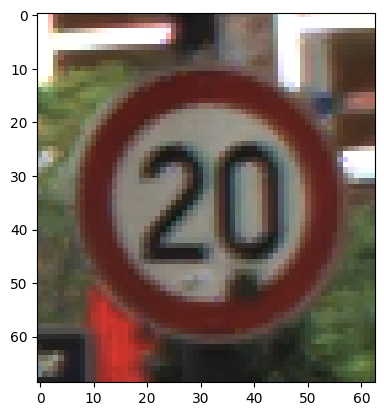

In [6]:
path = data_dir + '/Train/' + str(0)
images = os.listdir(path)
img = images[0]
print(img)
image = cv2.imread(path + '/' + img)
RGB_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_fromarray = Image.fromarray(RGB_im, 'RGB')
plt.imshow(image_fromarray)

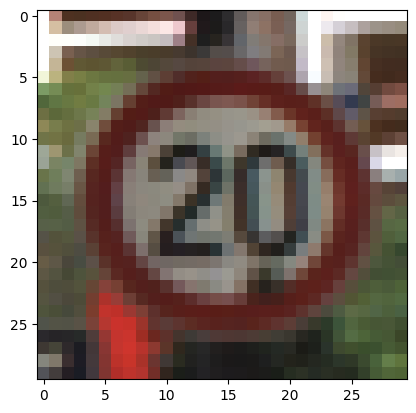

In [7]:
resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
plt.imshow(resize_image)

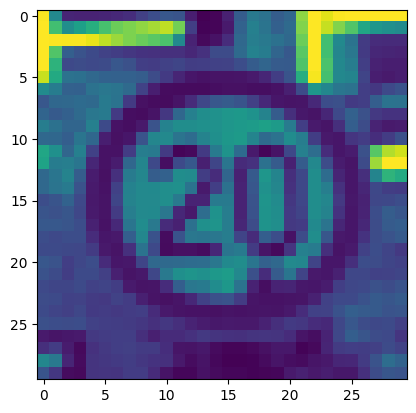

In [8]:
imgray = cv2.cvtColor(np.array(resize_image), cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)

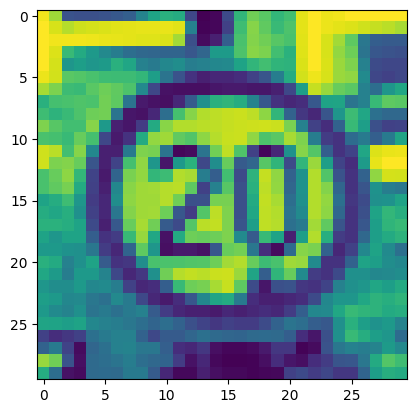

In [9]:
#直方图均衡化
equ = cv2.equalizeHist(imgray)
res = np.hstack((imgray,equ))
plt.imshow(equ)

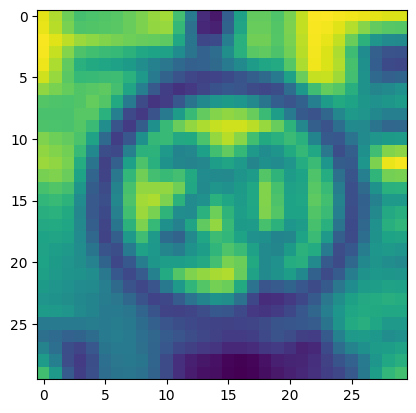

In [19]:
average_blur = cv2.blur(equ,(3,3))
plt.imshow(average_blur)

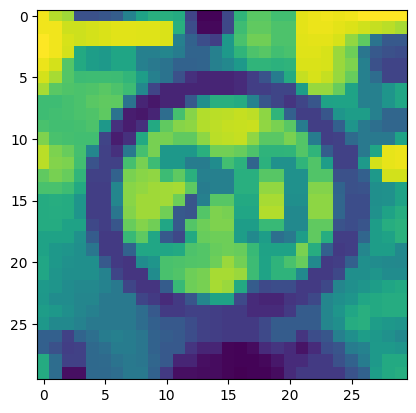

In [20]:
medium_blur = cv2.medianBlur(equ,3)
plt.imshow(medium_blur)

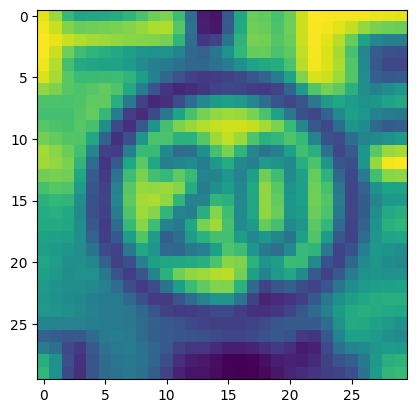

In [21]:
GaussianBlur = cv2.GaussianBlur(equ,(3,3),0)
plt.imshow(GaussianBlur)

# ============

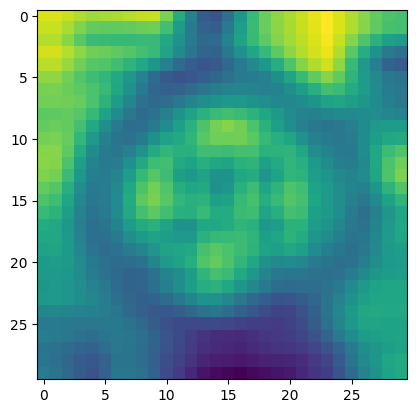

In [11]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(equ,-1,kernel)
plt.imshow(dst)

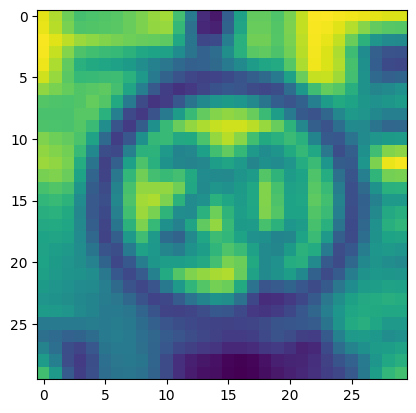

In [16]:
blur = cv2.blur(equ,(3,3))
plt.imshow(blur)

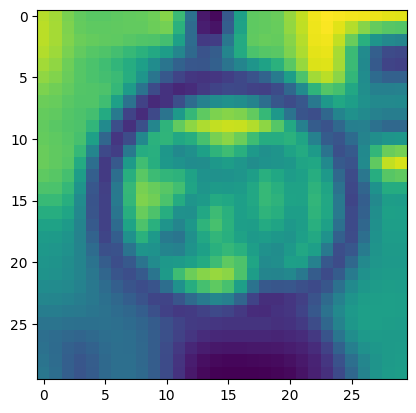

In [18]:
noiseless_image_bw = cv2.fastNlMeansDenoising(blur, None, 20, 7, 21) 
plt.imshow(noiseless_image_bw)

In [9]:
# move resize
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            #列表不够整齐，如果创建多维列表，子列表中的元素得个数一致，如果不一致，那么默认还是一维列表，把子列表当做元素而已
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))      
            imgray = cv2.cvtColor(np.array(resize_image), cv2.COLOR_BGR2GRAY)
            flat_arr=imgray.ravel()
            image_data.append(flat_arr)
            image_labels.append(i)
        except:
            print("Error in " + img)

In [10]:
image

array([[[26, 32, 36],
        [24, 32, 37],
        [21, 28, 34],
        ...,
        [44, 44, 52],
        [44, 44, 51],
        [42, 43, 49]],

       [[26, 31, 33],
        [23, 29, 32],
        [21, 28, 32],
        ...,
        [54, 52, 59],
        [44, 44, 49],
        [45, 46, 50]],

       [[26, 31, 31],
        [24, 29, 30],
        [25, 31, 34],
        ...,
        [51, 46, 52],
        [37, 37, 41],
        [40, 42, 44]],

       ...,

       [[37, 46, 49],
        [38, 43, 47],
        [35, 41, 46],
        ...,
        [46, 41, 43],
        [48, 36, 39],
        [53, 51, 55]],

       [[41, 50, 53],
        [37, 44, 48],
        [32, 39, 44],
        ...,
        [45, 44, 44],
        [43, 37, 40],
        [38, 38, 44]],

       [[32, 41, 44],
        [29, 38, 41],
        [27, 35, 39],
        ...,
        [46, 48, 50],
        [41, 41, 44],
        [40, 41, 46]]], dtype=uint8)

In [11]:
imgray

array([[33, 31, 29, 28, 27, 26, 23, 22, 20, 19, 19, 19, 20, 29, 56, 68,
        65, 65, 61, 51, 44, 44, 40, 38, 35, 42, 49, 50, 47, 45],
       [31, 29, 28, 26, 25, 22, 20, 20, 19, 19, 20, 21, 18, 31, 66, 66,
        57, 67, 59, 44, 46, 45, 41, 39, 40, 52, 61, 54, 45, 45],
       [30, 31, 32, 27, 24, 22, 21, 20, 20, 20, 21, 20, 18, 24, 47, 53,
        62, 56, 43, 38, 38, 38, 38, 42, 54, 58, 56, 55, 45, 39],
       [31, 33, 32, 27, 24, 23, 21, 20, 20, 21, 20, 19, 18, 20, 31, 42,
        47, 43, 39, 42, 39, 40, 51, 46, 51, 45, 42, 42, 39, 37],
       [33, 33, 30, 27, 24, 22, 21, 20, 20, 20, 19, 19, 19, 25, 37, 50,
        59, 54, 48, 50, 39, 42, 51, 44, 38, 38, 42, 44, 42, 38],
       [34, 30, 25, 25, 24, 23, 23, 22, 21, 21, 22, 32, 34, 38, 49, 53,
        51, 52, 51, 43, 44, 61, 48, 41, 38, 40, 40, 39, 37, 38],
       [32, 25, 24, 26, 26, 26, 23, 21, 27, 34, 37, 52, 62, 66, 72, 70,
        69, 70, 61, 51, 52, 54, 45, 46, 49, 52, 42, 37, 42, 44],
       [31, 28, 27, 28, 27, 26, 22, 29, 4

In [12]:
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values
test_data =[]
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        imgray = cv2.cvtColor(np.array(resize_image), cv2.COLOR_BGR2GRAY)
        flat_arr=imgray.ravel()
        test_data.append(np.array(flat_arr))
    except:
        print("Error in " + img)